# Viterbi Algorithm for Connecting Fragments in Long-Range Paths
Frederick Xu

## Introduction

wip

In [6]:
import numpy as np
from brainlit.algorithms.connect_fragments.tests.grid_generator import grid_gen
from brainlit.algorithms.connect_fragments.dynamic_programming_viterbi import viterbi_algorithm
import matplotlib.pyplot as plt

## Running a 10x10 Grid Example

Soma label:  {5: [(9, 9, 0)]}


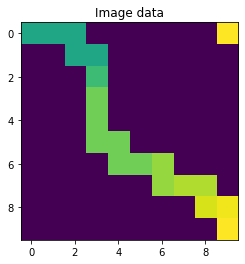

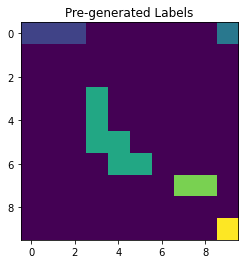

In [10]:
# Load the 10x10 example from grid_generator
img, lbls, _ , somas = grid_gen(10)
plt.figure()
plt.title("Image data")
plt.imshow(img[:,:,0])
plt.figure()
plt.title("Pre-generated Labels")
plt.imshow(lbls[:,:,0])

# Initiate the algorithm class
alg = viterbi_algorithm(img, lbls, somas, [1,1,1])
print("Soma label: ", somas)

In [12]:
# Manually identify the endpoints. Note that Labels 2 and 5 are "blobs" and do not have endpoints
endpoints = {}
endpoints[1] = ((0,0,0),(0,2,0))
endpoints[3] = ((3,3,0),(6,5,0))
endpoints[4] = ((7,7,0),(7,8,0))
# Assign the endpoints
alg.end_points = endpoints

## Running Viterbi Algorithm

Within the Viterbi class object, we first need to compute the distance matrices. After that, we can run the Viterbi algorithm to find the best path.

In [15]:
def print_path(alg, path):
    c = alg.connection_mat
    path_lbls = path[1]
    for i in range(len(path_lbls)-1):
        from_lbl = path_lbls[i]
        to_lbl = path_lbls[i+1]

        print(f"From {from_lbl} to {to_lbl}: {c[0][from_lbl][to_lbl]}, {c[1][from_lbl][to_lbl]}")

In [16]:
alg.compute_all_dists()
top_path, sorted_paths = alg.viterbi_frag(1, K=4, somas=alg.somas)
print(top_path)
print_path(alg, top_path)   

(1.1241229611526466, [1, 3, 4, 5, 5])
From 1 to 3: [0 2 0], [3 3 0]
From 3 to 4: [6 5 0], [7 7 0]
From 4 to 5: [7 8 0], [9 9 0]
From 5 to 5: [0 0 0], [0 0 0]


Explain the path here

## Testing on Real Images

In [ ]:
# Set up download from S3, fragments etc.